Generate random captcha images used later for training and validation.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tqdm.auto import trange
import captchanet

data_dir = Path('/home/hadim/.data/Neural_Network/captchanet')

dataset_dir = data_dir / 'dataset'
dataset_dir.mkdir(exist_ok=True, parents=True)

train_data_path = dataset_dir / 'training.tfrecord'
val_data_path = dataset_dir / 'validation.tfrecord'

alphabet_path = dataset_dir / "alphabet.txt"
tokenizer_path = dataset_dir / "tokenizer"

font_path = data_dir / 'fonts' / 'NimbusSanL-Bol.otf'

In [ ]:
n_images = 100000
image_size = (400, 120)
watermark = "République Française - référendum d'initiative partagée"

word_length_min = 5
word_length_max = 10

generator = captchanet.CaptchaGenerator(image_size=image_size, font_size=73, font_path=font_path)
generator.font_path = str(font_path)

# Create a tokenizer and save it.
vocabulary = set(generator.alphabet)
# This is the padding value.
vocabulary.add(captchanet.PADDING_VALUE)
tokenizer = tfds.features.text.TokenTextEncoder(vocabulary)
tokenizer.save_to_file(str(tokenizer_path))

# Split dataset for training and validation.
train_size = 0.8
train_n = int(n_images * train_size)

train_writer = tf.io.TFRecordWriter(str(train_data_path))
val_writer = tf.io.TFRecordWriter(str(val_data_path))

for i in trange(n_images):
  # Generate a random word and an image.
  word, image = generator(n_min=word_length_min, n_max=word_length_max, watermark=watermark)
  image = image.convert('RGB')
  
  # Pad label with a padding value.
  word_padded = word.ljust(word_length_max, captchanet.PADDING_VALUE)
  
  # Create TF feature
  example = captchanet.encode_data(image, word_padded, tokenizer)
  
  if i < train_n:
    writer = train_writer
  else:
    writer = val_writer
    
  # Save data to TFRecord.
  writer.write(example.SerializeToString())
  
train_writer.close()
val_writer.close()
  
# Save the alphabet.
with open(alphabet_path, 'w') as f:
  f.write(''.join(generator.alphabet))

In [ ]:
# Check the dataset by displaying some images.

n  = 8
dataset = tf.data.TFRecordDataset(str(train_data_path))
dataset = dataset.map(map_func=captchanet.decode_data(tokenizer, max_len_word=10, input_as_dict=True))
dataset = dataset.shuffle(1024)
dataset = dataset.batch(n)
data = [d for d in dataset.take(1)][0]

images = data['image']
labels = data['label']

# Plot
original_images = data['original_image'].numpy()
words = data['word'].numpy()
words = [w.decode('utf-8').replace('0', '') for w in words]

size = 3
ncols = 2
nrows = n // ncols
ratio = images.shape[2] / images.shape[1]
figsize = (ncols * size * ratio, size * nrows)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
axs = axs.flatten()

for image, word, ax in zip(original_images, words, axs):
  ax.imshow(image)
  
  text = f'True: {word} ({len(word)})'
  ax.set_title(text)

In [4]:
n_images = 100000
image_size = (400, 120)
watermark = "République Française - référendum d'initiative partagée"

word_length_min = 5
word_length_max = 10

generator = captchanet.CaptchaGenerator(image_size=image_size, font_size=73, font_name='NimbusSanL-Bol.otf')
generator.font_path = str(font_path)

In [ ]:
word = 'Mh3vUvg'
image = generator.generate_image_from_word(word, watermark=watermark)
image

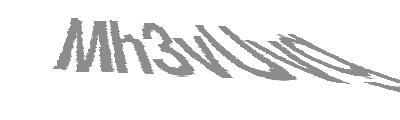

In [128]:
w = 400
h = 120

dx = w * np.random.uniform(0, 1)
dy = h * np.random.uniform(0, 1)
x1 = int(np.random.uniform(-dx, dx))
y1 = int(np.random.uniform(-dy, dy))
x2 = int(np.random.uniform(-dx, dx))
y2 = int(np.random.uniform(-dy, dy))
w2 = w + abs(x1) + abs(x2)
h2 = h + abs(y1) + abs(y2)
data = (x1, y1, -x1, h2 - y2, w2 + x2, h2 + y2, w2 - x2, -y1)
image = image.resize((w2, h2))
image = image.transform((w, h), Image.QUAD, data)
image

In [ ]:
from skimage.transform import swirl
from PIL import Image

swirled = swirl(np.array(image)[:, :, 0], center=(10, 50), strength=5, radius=120)
swirled = swirled * 255
swirled = swirled.astype('uint8')
Image.fromarray(swirled)

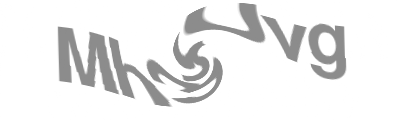

In [124]:
image_width = 400
image_height = 120

swirl_center_x = np.random.normal(image_width / 2, image_width / 5)
swirl_center_x = max(swirl_center_x, 0)
swirl_center_x = min(swirl_center_x, image_width)
swirl_center_x = int(swirl_center_x)

swirl_center_y = np.random.normal(image_height / 2, image_height / 5)
swirl_center_y = max(swirl_center_y, 0)
swirl_center_y = min(swirl_center_y, image_height)
swirl_center_y = int(swirl_center_y)

center = (swirl_center_x, swirl_center_y)
center = (image_width / 2, image_height / 2)

swirled = swirl(np.array(image)[:, :, 0], center=center, strength=5, radius=200)
swirled = swirled * 255
swirled = swirled.astype('uint8')
Image.fromarray(swirled)

In [71]:
center

(381, 120)